# Homework 4: Sound Classificationn

<div class="alert alert-block alert-success">
    
Please read the instructions carefully. Please include any discussion in markdown format below your code.

</div>

### Part 0: Download the Dataset
(no points)

<div class="alert alert-block alert-success">

Run the code below to download the medley-solos-db dataset, which is a dataset of solo instrument recordings. Note that the download is large (9 GB) and will take about 20 minutes to finish.

<b> Important: you have to first update mirdata to the latest version (at least 0.0.19) </b>
    
</div>

In [62]:
import mirdata
import os
import librosa
"""
data_home = mirdata.utils.get_default_dataset_path(mirdata.medley_solos_db.DATASET_DIR)
if not os.path.exists(data_home):
    print("Downloading Medley Solos DB... this will take a while")
    mirdata.medley_solos_db.download() """

'\ndata_home = mirdata.utils.get_default_dataset_path(mirdata.medley_solos_db.DATASET_DIR)\nif not os.path.exists(data_home):\n    print("Downloading Medley Solos DB... this will take a while")\n    mirdata.medley_solos_db.download() '

### Part 1: Compute MFCCs

<div class="alert alert-block alert-success">

Write a function that, using librosa, computes MFCCs given an audio file. Remove the 0th coefficient.

</div>

In [94]:
def compute_mfccs(y, sr, n_fft=2048, hop_length=512, n_mels=128, n_mfcc=20):
    """Compute mfccs for an audio file, removing the 0th MFCC coefficient
    
    Parameters
    ----------
    y : np.array
        Mono audio signal
    sr : int
        Audio sample rate
    n_fft : int
        Number of points for computing the fft
    hop_length : int
        Number of samples to advance between frames
    n_mels : int
        Number of mel frequency bands to use
    n_mfcc : int
        Number of mfcc's to compute
    
    Returns
    -------
    mfccs: np.array (t, n_mfcc - 1)
        Matrix of mfccs

    """
    # write the function here
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
    mfccs_flipped = mfccs.transpose()
    mfccs_flipped_corr = np.delete(mfccs_flipped, 0, axis=1)
    return mfccs_flipped_corr

In [95]:
# test your code here
example_trackid = 'd07b1fc0-567d-52c2-fef4-239f31c9d40e'
example_track = mirdata.medley_solos_db.Track(example_trackid)
y_test, fs_test = example_track.audio

example_mfcc = compute_mfccs(y_test, fs_test)
print("{} time frames, {} mfcc coefficients".format(example_mfcc.shape[0], example_mfcc.shape[1]))
print(example_mfcc)

129 time frames, 19 mfcc coefficients
[[ 97.929504  -29.378279   -2.2925391 ...  -7.644833  -10.410239
   11.87488  ]
 [ 77.07739   -28.036175   -7.7601395 ... -11.156181  -13.386547
   10.145931 ]
 [ 19.485245  -38.295094   -9.099785  ... -13.3425865  -8.013262
   14.643888 ]
 ...
 [ -6.2745514 -86.26283   -24.062695  ... -33.31951   -17.808582
   32.384735 ]
 [102.1994    -42.30523   -27.749132  ... -19.543322  -13.561288
   20.308884 ]
 [123.01133   -36.69036   -33.646507  ... -15.013291  -11.476622
   12.919283 ]]


### Part 2: Compute summary statistics

<div class="alert alert-block alert-success">

Write a function that computes the mean and the standard deviation over a matrix of features.

</div>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
def get_stats(features):
    """Compute summary statistics (mean and standard deviation) over a matrix of features.
    Make sure the statitics are computed across features
    (i.e. over all examples, compute the mean of each feature)

    Parameters
    ----------
    features: np.array (n_examples, n_features)
        Matrix of features

    Returns
    -------
    features_mean: np.array (n_features)
        The mean of the features
    features_std: np.array (n_features)
        The standard deviation of the features

    """
    
    # write the function here
    
    features_mean = np.mean(features, axis=0)
    features_std = np.std(features, axis=0)
    
    return features_mean, features_std\

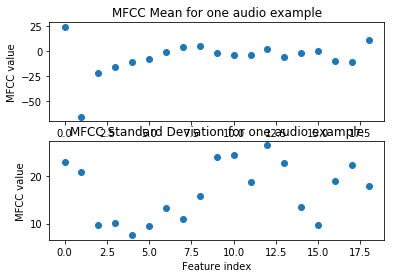

In [100]:
# test your function: 
example_mean, example_std = get_stats(example_mfcc)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(example_mean)), example_mean, 'o')
plt.title("MFCC Mean for one audio example")
plt.xlabel("Feature index")
plt.ylabel("MFCC value")

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(example_std)), example_std, 'o')
plt.title("MFCC Standard Deviation for one audio example")
plt.xlabel("Feature index")
plt.ylabel("MFCC value")

plt.show()

### Part 3: Normalize Features

<div class="alert alert-block alert-success">

Write a function that normalizes a feature matrix given means and standard deviations, and input features, so that the resulting normalized features have a mean of 0 and a standard deviation of 1 per feature.

</div>

In [104]:
def normalize(features, features_mean, features_std):
    """Normalize (standardize) a set of feautres using the given mean and standard deviation

    Parameters
    ----------
    features: np.array (n_examples, n_features)
        Matrix of features
    features_mean: np.array (n_features)
        The mean of the features
    features_std: np.array (n_features)
        The standard deviation of the features

    Returns
    -------
    features_norm: np.array (n_examples, n_features)
        Standardized features

    """
    # write the function here
    
    features_norm = (features - features_mean) / features_std
    
    return features_norm

In [105]:
# test your code here
example_normalized = normalize(example_mfcc, example_mean, example_std)

print(np.mean(example_normalized, axis=0))
print(np.std(example_normalized, axis=0))

[ 2.25481131e-07 -5.11953090e-07  2.61521166e-07  3.26208379e-07
 -2.55514493e-07  3.60400179e-07  7.30041378e-08  1.42514011e-07
 -9.70308136e-08 -5.59082309e-08 -1.05116715e-08  1.20248899e-07
  3.55779655e-08  8.45554240e-08 -3.30366845e-08 -3.46538642e-09
 -9.63377431e-08 -5.05946396e-08  2.19416705e-07]
[1.         1.         1.         1.0000002  0.99999976 1.0000001
 1.         0.99999994 1.0000002  1.         0.9999999  0.9999999
 1.0000001  0.9999999  0.99999994 0.9999998  0.99999994 0.9999998
 1.        ]


### Part 4: Compute Features

<div class="alert alert-block alert-success">

Write a function that, for a given audio file computes mfccs, and returns the mean and standard deviation of the mfccs over time, stacked into a single vector

</div>

In [106]:
def compute_features(audio, sr, n_fft=2048, hop_length=512, n_mels=128, n_mfcc=20):
    """Compute summary statistics for MFCCs over time, given an audio file.

    Parameters
    ----------
    audio : np.array
        Mono audio signal
    sr : int
        Audio sample rate
    n_fft : int
        Number of points for computing the fft
    hop_length : int
        Number of samples to advance between frames
    n_mels : int
        Number of mel frequency bands to use
    n_mfcc : int
        Number of mfcc's to compute

    Returns
    -------
    features: np.array (1, 2*(n_mfcc - 1))
        The features, which should be the mean and standard deviation of the MFCCs
        stacked into a single vector.

    """
    # write the function here
    mfccs = compute_mfccs(audio, sr, n_fft, hop_length, n_mels, n_mfcc)
    features_mean, features_std = get_stats(mfccs)
    stacked = np.hstack((features_mean,features_std))
    stacked_dim = np.expand_dims(stacked, axis=0)
    
    return stacked_dim

In [107]:
# test your code here
example_features = compute_features(y_test, fs_test)
print(example_features.shape)

(1, 38)


### Part 5: Get features for the training, validation, and test sets

<div class="alert alert-block alert-success">

Write a function that computes all the feautres for a list of tracks and stacks them into a matrix.

</div>

In [111]:
def get_features_and_labels(track_list, n_fft=2048, hop_length=512, n_mels=128, n_mfcc=20):
    """Compute summary statistics for MFCCs over time, given an audio file.

    Parameters
    ----------
    track_list : list
        list of mirdata.medley_solos_db.Track objects
    n_fft : int
        Number of points for computing the fft
    hop_length : int
        Number of samples to advance between frames
    n_mels : int
        Number of mel frequency bands to use
    n_mfcc : int
        Number of mfcc's to compute

    Returns
    -------
    feature_matrix: np.array (len(track_list), 2*(n_mfcc - 1))
        The features for each track, stacked into a matrix.
    label_array: np.array (len(track_list))
        The label for each track, represented as integers
    """
    # write the function here
    
    feature_matrix = np.empty((len(track_list), 2*(n_mfcc-1)))
    label_array = np.empty((len(track_list)))
    i=0
    for track in track_list: 
        audio, sr = track.audio
        feature = compute_features(audio, sr, n_fft, hop_length, n_mels, n_mfcc)
        feature_matrix[i] = feature
        label = track.instrument_id
        label_array[i] = label
        i+=1
        
    return feature_matrix, label_array
        

In [113]:
# run this to create the track lists
all_tracks = mirdata.medley_solos_db.load()
tracks_train = [t for t in all_tracks.values() if t.subset == 'training']
tracks_validate = [t for t in all_tracks.values() if t.subset == 'validation']
tracks_test = [t for t in all_tracks.values() if t.subset == 'test']

print("There are {} tracks in the training set".format(len(tracks_train)))
print("There are {} tracks in the validation set".format(len(tracks_validate)))
print("There are {} tracks in the test set".format(len(tracks_test)))

There are 5841 tracks in the training set
There are 3494 tracks in the validation set
There are 12236 tracks in the test set


In [114]:
# run this to compute features
X_raw_train, Y_train = get_features_and_labels(tracks_train)
X_raw_validate, Y_validate = get_features_and_labels(tracks_validate)
X_raw_test, Y_test = get_features_and_labels(tracks_test)

### Part 6: Normalize the features

<div class="alert alert-block alert-success">

Compute summary statistics on the training set, and normalize the training, validation, and test set
using the training summary statistics.

</div>

In [117]:
# write the code here
features_mean, features_std = get_stats(X_raw_train)

X_train = normalize(X_raw_train, features_mean, features_std)
X_validate = normalize(X_raw_validate, features_mean, features_std)
X_test = normalize(X_raw_test, features_mean, features_std)

### Part 7: Fit a k-nearest neighbor classifier

<div class="alert alert-block alert-success">

Train a k-nearest neighbor classifier on the training set, and select k using the validation set. This time, using sklearn.metrics.f_measure to measure overall performance and to select the best k. The function below should also plot the f-measure on the validation set as a function of k.

</div>

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [132]:
def fit_knn_clf(train_features, train_labels, validation_features, validation_labels):
    """Fit a k-nearest neighbor classifier and choose the k which maximizes the
    *f-measure* on the validation set.
    
    Plot the f-measure on the validation set as a function of k.

    Parameters
    ----------
    train_features : np.array (n_train_examples, n_features)
        training feature matrix
    train_labels : np.array (n_train_examples)
        training label array
    validation_features : np.array (n_validation_examples, n_features)
        validation feature matrix
    validation_labels : np.array (n_validation_examples)
        validation label array

    Returns
    -------
    knn_clf : scikit learn classifier
        Trained k-nearest neighbor classifier with the best k
    best_k : int
        The k which gave the best performance
    """
    # write the function here

    # search over k = 1, 5, 10, 50
    
    # dont forget the plot!
    
    knn_clf1 = KNeighborsClassifier(n_neighbors=1)
    knn_clf1.fit(train_features, train_labels)
    y_pred1 = knn_clf1.predict(validation_features)
    score1 = f1_score(validation_labels, y_pred1, average='weighted')


    knn_clf5 = KNeighborsClassifier(n_neighbors=5)
    knn_clf5.fit(train_features, train_labels)
    y_pred5 = knn_clf5.predict(validation_features)
    score5 = f1_score(validation_labels, y_pred5, average='weighted')

    knn_clf10 = KNeighborsClassifier(n_neighbors=10)
    knn_clf10.fit(train_features, train_labels)
    y_pred10 = knn_clf10.predict(validation_features)
    score10 = f1_score(validation_labels, y_pred10, average='weighted')

    knn_clf50 = KNeighborsClassifier(n_neighbors=50)
    knn_clf50.fit(train_features, train_labels)
    y_pred50 = knn_clf50.predict(validation_features)
    score50 = f1_score(validation_labels, y_pred50, average='weighted')

    score_list = [score1, score5, score10, score50]
    best_score = max(score_list)

    if score1 == best_score:
        return knn_clf1, score1

    elif score5 == best_score:
        return knnclf5, score5

    elif score10 == best_score:
        return knnclf10, score10

    else:
        return knnclf50, score50

In [133]:
# train the models:
knn_clf, best_k = fit_knn_clf(X_train, Y_train, X_validate, Y_validate)
print(best_k)

0.7444470859111986


/Users/wesleyyu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Part 8: Compute and plot a confusion matrix for each setting

<div class="alert alert-block alert-success">

1. Predict the labels for the test set
2. Compute & print the f-measure
3. Compute the confusion matrix (use sklearn.metrics.confusion_matrix)
4. Plot the confusion matrix (see the example https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

Predict outputs on the test set, and compute the confusion matrix using sklearn.metrics.confusion_matrix

</div>

0.5720595894974918
Normalized confusion matrix
[[4.41e-01 3.14e-02 1.37e-02 4.23e-02 2.70e-01 5.46e-03 6.83e-03 1.89e-01]
 [0.00e+00 8.87e-01 2.09e-03 0.00e+00 7.33e-02 2.09e-03 4.19e-03 3.14e-02]
 [0.00e+00 1.75e-03 8.44e-01 0.00e+00 4.38e-02 1.05e-02 0.00e+00 9.98e-02]
 [1.09e-01 1.77e-02 3.32e-02 1.80e-01 2.73e-01 5.37e-03 4.33e-02 3.38e-01]
 [3.83e-04 7.28e-03 7.67e-04 3.83e-04 9.77e-01 0.00e+00 0.00e+00 1.38e-02]
 [0.00e+00 2.55e-01 9.23e-03 0.00e+00 4.09e-01 5.85e-02 1.85e-02 2.49e-01]
 [1.08e-01 2.46e-03 2.46e-03 1.48e-02 7.14e-02 1.06e-01 4.93e-01 2.02e-01]
 [2.93e-02 1.72e-02 1.03e-03 2.76e-02 1.97e-01 1.72e-03 4.14e-03 7.22e-01]]


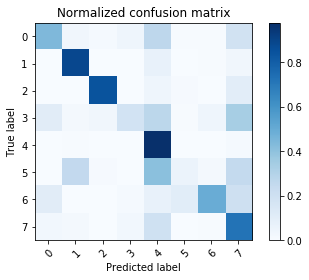

In [140]:
y_pred = knn_clf.predict(X_test)
test_score = f1_score(Y_test, y_pred, average='weighted')

print(test_score)

matrix = confusion_matrix(Y_test, y_pred) #each setting? i just used the best k-value sorry :(

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix")
print(matrix)

fig, ax = plt.subplots()
im = ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(matrix.shape[1]), yticks=np.arange(matrix.shape[0]), title="Normalized confusion matrix",
ylabel='True label',
xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

np.set_printoptions(precision=2)

plt.show()

### Part 9: Perform Error Analysis

<div class="alert alert-block alert-success">

1. Which instrument class has the best & worst performance?
2. For the worst source, what other sources are commonly confused? Why?
3. Listen to the audio for examples the classifier got wrong. What do they have in common?

</div>

In [142]:
import IPython.display as ipd

example_trackid = "373844f6-0011-59b7-f472-bd7f5b0a384b" #tenor sax
example_track = mirdata.medley_solos_db.Track(example_trackid)
x, fs = example_track.audio


ipd.Audio(x, rate=fs)

In [143]:
example_trackid = "cd83f3f3-f699-52c9-f415-2bfe8f27e6b4" #flute
example_track = mirdata.medley_solos_db.Track(example_trackid)
x, fs = example_track.audio


ipd.Audio(x, rate=fs)

0 = clarinet, 1 = distorted electric guitar, 2 = female singer, 3 = flute, 4 = piano, 5 = tenor sax, 6 = trumpet, 7 = violin (FROM THE METADATA)

1. The best instrumental class was #4, a.k.a piano. The worst one was #5, tenor sax. 
2. The classifer commonly predicted tenor sax as piano. I'm not sure exactly why but I'm guessing its either that the timbre of both instruments are similar in terms of frequency variation, or that the classifier was over-predicting sources as piano, and had no idea what the tenor sax was. 
3. Timbre! Flute and Sax were both commonly missed. Something to do with instruments that are blown to produce sound?